In [1]:
import matplotlib.pyplot as plt
import regex
import os
import numpy as np
import random

Wczytaj ścieżki ustaw:

In [4]:
law_paths = []
for file in os.listdir('./ustawy'):
    law_paths.append(os.path.join("./ustawy",file))

In [5]:
law_paths.remove('./ustawy/.DS_Store')
law_paths.remove('./ustawy/.ipynb_checkpoints')


Wczytaj zawartość ustaw:

In [6]:
laws_content= []
for file_name in law_paths:
    if file_name != './ustawy/.DS_Store':
        if os.path.isfile(file_name):
            with open(file_name, "r") as f:
                laws_content.append(f.read())


In [7]:
len(laws_content)

1178

### DODAJE SIĘ

Sprawdzenie co pojawia sie po "dodaje się":

In [8]:
random_laws = random.choices(laws_content, k=5)

In [9]:
reg = regex.compile(r"dodaje się", regex.IGNORECASE)

In [10]:
for law in random_laws:
    #returns an iterator yielding match objects matching the regex pattern in a string instead of a list.
    #number of matches is high, and you could risk filling up your memory by loading them all using findall(). 
    #you can get all possible matches in the form of an iterator object, which will improve performance.
    
    for match in reg.finditer(law):
        start, end = match.span()
        print(law[start:end + 25])
        print("="*30)

dodaje się ust. 3 w brzmieniu:
    
dodaje się pkt 10 w
     brzmieniu:
dodaje się ust. 3-5 w brzmieniu:
  
dodaje się art. 4a w brzmieniu:
   
dodaje się ust. 2a w brzmieniu:
   
dodaje się wyrazy " ,z zastrzeżenie
dodaje się ust. 2 w brzmieniu:
    
dodaje się ust. 1a w brzmieniu:
   


- dodaje się/ sie
- dodaje (bez się) punkt

In [11]:
reg = regex.compile(r"dodaje\s+(si[ęe]\s+)?[\w§]+", regex.IGNORECASE)
phrases = set()

for law_act in laws_content:
    for match in reg.finditer(law_act):
        start, end = match.span()
        phrases.add(law_act[start: end].split()[-1].lower())

print(phrases)

{'2', 'rozdziały', 'kwotę', 'nowe', 'zdanie', 'ozna', 'dział', 'informację', '3', 'trzykrotnie', 'zdania', 'trzecie', '4', 'każdorazowo', 'przecinek', 'litery', '5a', 'wyraz', '38a', 'oznaczenie', 'lp', '§3', 'się', 'po', 'usta', 'masę', 'zadanie', 'na', 'użyty', 'dwukropek', 'dwukrotnie', 'oddział', 'określenie', 'załącznik', 'art', 'ust', '§2', 'wyrazy', 'tytuł', 'kropkę', 'punkt', 'średnik', 'lit', 'w', 'drugie', 'wraz', 'poz', 'cyfrę', 'nowy', '§', 'tiret', 'pozycję', '2a', 'pkt', '§1a', 'odnośnik', 'rozdział', 'użyte'}


- dodaje się nowy/nowe ust. 1a w 
- dodaje się  5a i  5b w brzmieniu
- dodaje się § 2 w brzmieniu:
- załącznik
- punkt
- dodaje się oddział 5 w brzmieniu:
- rozdział/y
- pkt
- tiret
- dodaje się litery g)-j) w brzmieniu:
- dodaje się zdanie trzecie w brzmieniu:/ trzecie zdanie
- dodaje się lit e) w brzmieniu:
- oznaczenie rozdziału 6a
- dodaje się odnośnik nr 1 w brzmieniu: 
- zdanie

In [12]:
import collections
phrase= r"(dodaje\s+(si[eę]\s+)?(nowy\s+|nowe\s+)?(\d+|§|art|załącznik|punkt|pkt|oddział|rozdziały|rodział|tiret|litery|lit|zdanie|odnośnik|oznaczenie|zdanie|ust|usta))"
reg = regex.compile(phrase, regex.IGNORECASE)
count_additions =  collections.defaultdict(lambda: 0)
for i, law_act in enumerate(laws_content):
    matches_iterator = reg.finditer(law_act)
    for match in matches_iterator:
        count_additions[law_paths[i]] += 1
        
print(count_additions["./ustawy/1995_654.txt"])

9


### SKREŚLA SIE:

In [14]:
reg = regex.compile(r"skreśla (si[eę])?", regex.IGNORECASE)

In [15]:
for law in random_laws:
    #returns an iterator yielding match objects matching the regex pattern in a string instead of a list.
    #number of matches is high, and you could risk filling up your memory by loading them all using findall(). 
    #you can get all possible matches in the form of an iterator object, which will improve performance.
    
    for match in reg.finditer(law):
        start, end = match.span()
        print(law[start-30:end + 25])
        print("="*30)

ch.";
2) w art. 237{6}:
   a) skreśla się § 2,
   b) § 3 otrzymuje

zmiany:
1) w art. 2 w ust. 3 skreśla się wyraz "normami" i następ
azie
  przecinek;
2) w art. 5 skreśla się wyraz "normami" i następ
znego.";
4) w art. 8 w ust. 2 skreśla się wyrazy "przeprowadzeniu 
iu niezbędnych badań
  i";
5) skreśla się art. 10;
6) w art. 12 do
;
7) w art. 23:
   a) w pkt 1 skreśla się wyrazy "i norm",
   b) w
rt. 12 ust. 1.";
9) w art. 34 skreśla się ust. 3 i 4.
            
 1 oraz w art. 12 w pkt 1 i 3 skreśla się wyraz
  "akredytacji,";

 "akredytacji,";
3) w art. 21 skreśla się ust. 4;
4) w art. 22 skr
eśla się ust. 4;
4) w art. 22 skreśla się ust. 3;
5) w art. 25:
  
ę ust. 3;
5) w art. 25:
   a) skreśla się ust. 2,
   b) w ust. 3 s
la się ust. 2,
   b) w ust. 3 skreśla się wyraz "akredytacją,".
  
za się następujące zmiany:
1) skreśla się ust. 3;
2) w ust. 4 w pk
Centrum Badań i Certyfikacji" skreśla się.
                       
ust. 3 po wyrazie "świadczeń" skreśla się wyrazy "kształci się

In [17]:
reg = regex.compile(r"(skreśla|uchyla)\s+(si[ęe]\s+)?[\w§]+", regex.IGNORECASE)
phrases = set()

for law_act in laws_content:
    for match in reg.finditer(law_act):
        start, end = match.span()
        phrases.add(law_act[start: end].split()[-1].lower())

print(phrases)

{'pozostałą', 'wyrok', 'ustawę', 'uchwały', 'wyraz', 'psychologa', 'oznaczenie', 'przepisy', 'się', 'z', 'użyty', 'decyzje', 'postanowienia', 'go', 'oraz', 'art', 'wyrazy', 'decyzję', 'zaskarżone', 'postanowienie', 'zabezpieczenie', 'użyte', 'zastrzeżenie', 'dział', 'lub', 'ważność', 'przecinek', 'ten', 'zarządzenie', 'jego', 'nakaz', 'to', 'skutków', 'wydane', 'pytania', '11', 'kropkę', 'tytuł', 'powołanie', '1', 'sprzeczną', 'preambułę', '§', 'rzeczoznawcę', 'odnośnik', 'lit', 'aplikanta', 'przyimek', 'rozdziały', 'diagnostę', 'zdanie', 'biegłego', 'zdania', 'pozostałe', 'ostatnie', 'uchwałę', 'jeden', 'poprzednią', 'załącznik', 'zezwolenie', 'ją', 'lekarza', 'w', 'zakaz', 'tiret', 'pilota', 'prawomocnego', 'je', 'rozporządzenie', 'wszystkie', 'orzeczenie', 'na', 'odpowiedzialności', 'zakład', 'oddział', 'zaskarżony', 'ust', 'od', 'niezwłocznie', 'drugie', 'poz', 'odpowiednio', 'zaskarżoną', 'karę', 'pkt', 'rozdział', 'i'}


In [19]:
reg = regex.compile(r"(skreśla|uchyla)\s+(si[ęe]\s+)?w+\s", regex.IGNORECASE)

for law in laws_content:
    for match in reg.finditer(law):
        start, end = match.span()
        print(law[start-20:end + 25])
        print("="*30)

      Art. 3.
 § 1. Uchyla się w szczególności ustawę z dn
ne 
     orzeczenie uchyla w całości lub w części. 
 §
            skazany uchyla się w okresie próby od wykonani
 art. 42:
       a) skreśla się w ust. 1 pkt 5,
       b) s
bne przepisy.";
21) skreśla się w dziale pierwszym{ }rozdzi
rzymuje w mocy albo uchyla w całości lub w części i w 
la się pkt 3,
   b) skreśla się w pkt 13 lit. b w pkt 1.
  
zasowej, albo
   4) uchyla w całości lub w części decy
;
62) w art. 477{7} skreśla się w powołaniu wyrazy "i 477{3


In [28]:
import collections
phrase= r"((skreśla|uchyla)\s+(si[eę])?\s+(w)?(\d+|§|art|załącznik|zdania|tytuł|ust|oddział|rozdział|pkt|preambułę|lit|rozdziały|oznaczenie|poz.|zdanie))"
reg = regex.compile(phrase, regex.IGNORECASE)
count_removal =  collections.defaultdict(lambda: 0)
for i, law_act in enumerate(laws_content):
    matches_iterator = reg.finditer(law_act)
    for match in matches_iterator:
        count_removal[law_paths[i]] += 1
        
print(count_removal["./ustawy/1999_1100.txt"])

10


### Otrzymuje:

In [40]:
reg = regex.compile(r"otrzymuj[eą] brzmienie", regex.IGNORECASE)

In [41]:
for law in random_laws:
    for match in reg.finditer(law):
        start, end = match.span()
        print(law[start-30:end + 25])
        print("="*30)

30c ust. 1";
 
 2) rozdział 3 otrzymuje brzmienie:
                       
";
 4) w art. 4:
   a) ust. 1 otrzymuje brzmienie:
       "1. Minister Rol
amach kwoty B.",
   b) ust. 2 otrzymuje brzmienie:
       "2. Ustalenie li
go producenta.",
   e) ust. 6 otrzymuje brzmienie:
       "6. Opłaty, o kt
soby uprawnione.";
 8) art. 8 otrzymuje brzmienie:
        "Art. 8. 1. Upr
tawie.";
 9) w art. 10 ust. 2 otrzymuje brzmienie:
       "2. Producenci c
      rolników.";
10) art. 11 otrzymuje brzmienie:
         "Art. 11. Do S


In [42]:
reg = regex.compile(r"\s[\w§1-9\.]+\s+[\w§1-9\.]+\s+otrzymuj[eą]\s+brzmienie", regex.IGNORECASE)
phrases = set()

for law_act in laws_content:
    for match in reg.finditer(law_act):
        start, end = match.span()
        phrases.add(" ".join(law_act[start: end].split()[0:4]).lower())


- 'załącznika otrzymuje brzmienie',
-  §6 otrzymuje brzmienie'
- 2 otrzymuje brzmienie'
- ust.2 otrzymuje brzmienie',
-opis otrzymuje brzmienie
art bez kropki
 'art. 9e otrzymuje brzmienie',
 'art.23 ust.4 otrzymuje brzmienie',
 'do ustawy otrzymuje brzmienie',
 'do ustawy otrzymują brzmienie',
 'do wyliczenia otrzymuje brzmienie',
 'drugie zdanie otrzymuje brzmienie',
'dział viii otrzymuje brzmienie',
 'działu ii otrzymuje brzmienie',
    'kategoria xi otrzymuje brzmienie',
    lp. 9 otrzymuje brzmienie',
 'nr 1 otrzymuje brzmienie',
 'oddział 3 otrzymuje brzmienie',

 'pkt 1 otrzymuje brzmienie',
     'rozdział iia otrzymuje brzmienie',
 'rozdział xi otrzymuje brzmienie',
 'rozdziału 1 otrzymuje brzmienie',
§6 otrzymuje brzmienie',
 ' 2 otrzymuje brzmienie',
 ' tiret otrzymuje brzmienie',
    tytuł/u
 '§ 1 otrzymuje brzmienie',

In [67]:
single_phrase =  r"(ust\.\d+|tiret|§\d+)\s+otrzymuj[eą]\s+brzmienie"
phrase =  r"(art\.?|oddział|oddziału|tiret|lit\.|nr|lp\.|poz\.|rozdział|rozdziału|pkt|ust\.?)\s+[\w§]+\s+otrzymuj[eą]\s+brzmienie"
phrace_merged = r"\s+(single|longer_phrase)".replace('single', single_phrase).replace('longer_phrase', phrase)

reg = regex.compile(phrace_merged, regex.IGNORECASE)
count_change =  collections.defaultdict(lambda: 0)

for i, law_act in enumerate(laws_content):
    matches_iterator = reg.finditer(law_act)
    for match in matches_iterator:
        count_change[law_paths[i]] += 1
        
count_change["./ustawy/1997_753.txt"]

5

#### Plot results from point 1 showing how the percentage of amendments of a given type changed in the consecutive years

In [59]:
# Get the year from file:

reg = regex.compile(r"U\s?S\s?T\s?A\s?W\s?A\s+(KONSTYTUCYJNA\s+|BUDŻETOWA\s+NA\s+ROK\s+\d+\s+\s+)?z\s+dnia\s+\d+\s+\w+\s+\d+", regex.IGNORECASE) 
years = []
years_of_files =  collections.defaultdict(lambda: 0)

for i,law_act in enumerate(laws_content):
    matches = reg.finditer(law_act)
    for match in matches:
        start, end = match.span()
        years.append(law_act[start: end].split()[-1])
        years_of_files[law_paths[i]] = law_act[start: end].split()[-1].lower()
        break
    


In [112]:
combined_amendments =   collections.defaultdict(lambda: 0)
additions =  collections.defaultdict(lambda: 0)
removals=  collections.defaultdict(lambda: 0)
changes  =  collections.defaultdict(lambda: 0)

for file, year in years_of_files.items():
    additions[year] += count_additions[file]
    removals[year] += count_removal[file]
    changes[year] += count_change[file]
    combined_amendments[year] += count_additions[file] + count_removal[file] +count_change[file]

In [81]:
df = pd.dataframe()
combine_percentage = {}
for year in combined_amendments.keys():
    df
    combine_percentage[year] = {'Additions_perc' : round(additions[year]/combined_amendments[year]*100, 2),
                                'Removals_perc': round(removals[year]/combined_amendments[year]*100, 2),
                                'Changes_perc': round(changes[year]/combined_amendments[year]*100, 2)}


Posortuj słownik o rokach:

In [109]:
sorted_combine_percentage = collections.OrderedDict(sorted(combine_percentage.items()))

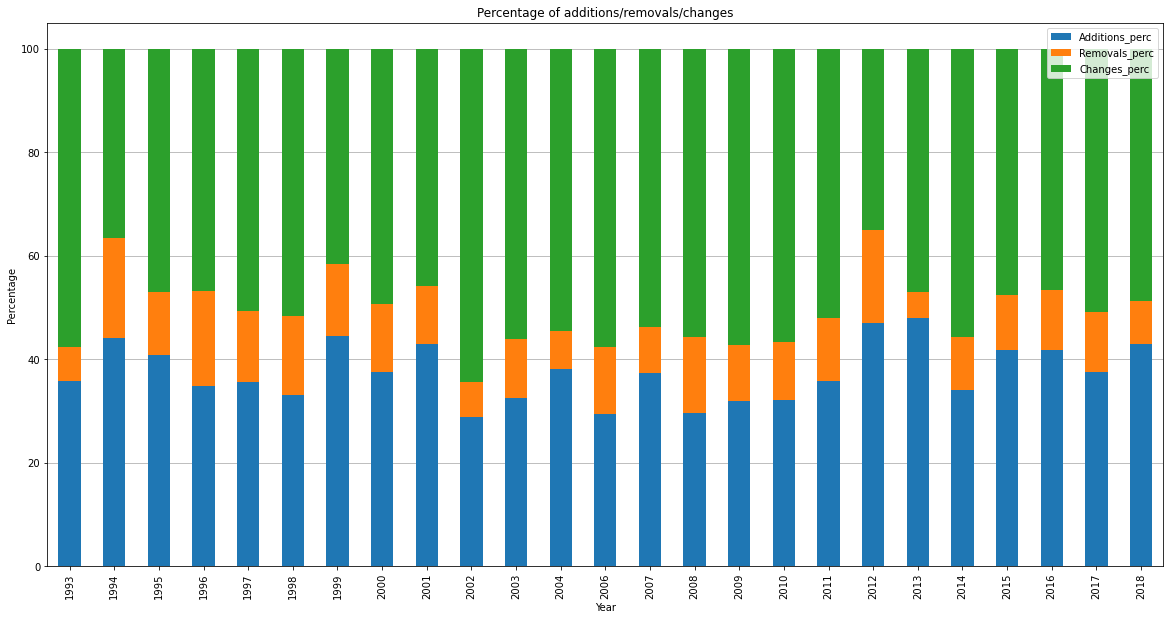

In [110]:
import pandas as pd
df = pd.DataFrame(sorted_combine_percentage).T
plt.rcParams["figure.figsize"] = [20, 10]
ax = df.plot(kind='bar', stacked=True)
ax.set_axisbelow(True)
ax.grid(axis='y')
plt.xticks(range(len(sorted_combine_percentage.keys())), sorted_combine_percentage.keys())
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of additions/removals/changes')
plt.show()

### Compute the total number of occurrences of the word ustawa in any inflectional form (ustawa, ustawie, ustawę, etc.) and all spelling forms (ustawa, Ustawa, USTAWA), excluding other words with the same prefix (e.g. ustawić).

In [134]:
reg = regex.compile(r"ustaw\w+\s?", regex.IGNORECASE)
phrases = set()

for law in laws_content:
    for match in reg.finditer(law):
        start, end = match.span()
        phrases.add(law[start: end].lower())

print(phrases)

{'ustawy', 'ustawodawstwem ', 'ustawa', 'ustawę', 'ustawodawczą ', 'ustawowy', 'ustawowych\n', 'ustawami ', 'ustawodastw ', 'ustawa\n', 'ustawodawcza ', 'ustawową\n', 'ustawowych', 'ustawowe', 'ustawowego\n', 'ustawowo\n', 'ustawiczne ', 'ustawom', 'ustawowych ', 'ustawami', 'ustawianie ', 'ustawową ', 'ustawiacz', 'ustawami\n', 'ustawą', 'ustawowym\n', 'ustawicznego', 'ustawicznego ', 'ustawodawstw ', 'ustawowemu\n', 'ustawy ', 'ustawowe ', 'ustawyz ', 'ustawiania ', 'ustaw1', 'ustawowego ', 'ustawowej\n', 'ustawowy ', 'ustaworaz ', 'ustawodawstw\n', 'ustawie', 'ustawodawczej', 'ustawodawczego ', 'ustawa\xa0', 'ustawodawczą\n', 'ustawowe\n', 'ustawach ', 'ustawach\n', 'ustawowi ', 'ustawodawczej ', 'ustawą ', 'ustawom ', 'ustawa ', 'ustawowej ', 'ustawowego', 'ustawowymi\n', 'ustawiaczy ', 'ustawowymi ', 'ustawowymi', 'ustawodawczym', 'ustawodawcze ', 'ustawicznym ', 'ustawicznego\n', 'ustawodawczego', 'ustawiania\n', 'ustawy\n', 'ustawodawstwu ', 'ustawach', 'ustawowym', 'ustawowy\n'

In [159]:
reg = regex.compile(r"\bustaw(y|a|ę|ach|ami|ą|ie|o|om)?\b", regex.IGNORECASE)
counter = 0

matches = []
for law in laws_content:
    for match in reg.finditer(law):
        counter += 1
        start, end = match.span()
        matches.append(law[start: end])
        
print(np.unique(matches))
print(f'number of occurences of word: ustawa - {counter}')

['USTAWA' 'USTAWY' 'USTAWa' 'Ustaw' 'Ustawa' 'Ustawie' 'Ustawy' 'Ustawę'
 'ustaw' 'ustawA' 'ustawa' 'ustawach' 'ustawami' 'ustawie' 'ustawom'
 'ustawy' 'ustawą' 'ustawę']
number of occurences of word: ustawa - 24934


### Compute the total number of occurrences of the same word (same conditions), followed by z dnia expression.

Definitions:
Look ahead positive (?=)

In [160]:
reg = regex.compile(r"\bustaw(y|a|ę|ach|ami|ą|ie|o|om)?\b(?=\s+z\s+dnia\b)", regex.IGNORECASE)
counter_followed_by = 0

for law in laws_content:
    for match in reg.finditer(law):
        counter_followed_by += 1

print(f'number of occurences of word: ustawa - {counter_followed_by}  followed by z dnia')

number of occurences of word: ustawa - 8587  followed by z dnia


### As above, but not followed by z dnia expression. Is the result correct (result 4 =? result 5 + result 6)?

Look ahead negative (?!)
Find expression A where expression B does not follow:

In [167]:
reg = regex.compile(r"\bustaw(y|a|ę|ach|ami|ą|ie|o|om)?\b(?!\s+z\s+dnia\b)", regex.IGNORECASE)
counter_not_followed_by = 0

for law in laws_content:
    for match in reg.finditer(law):
        counter_not_followed_by += 1

print(f'number of occurences of word: ustawa - {counter_not_followed_by}  followed by z dnia')

number of occurences of word: ustawa - 16347  followed by z dnia


In [155]:
if counter_not_followed_by + counter_followed_by == counter:
    print("It's good")

It's good


### Compute the total number of occurrences of the word ustawa in any inflectional form, excluding occurrences following o zmianie expression.


(?<=B)A
Look behind negative (?<!)
Find expression A where expression B does not precede:

In [164]:
reg = regex.compile(r"(?<!o\s+zmianie\s+)\bustaw(y|a|ę|ach|ami|ą|ie|o|om)?\b", regex.IGNORECASE)
counter_expression_precedes = 0

for law in laws_content:
    for match in reg.finditer(law):
        counter_expression_precedes += 1

print(f'number of occurences of word: ustawa - {counter_expression_precedes} excluding occurrences following o zmianie expression')

number of occurences of word: ustawa - 24068 excluding occurrences following o zmianie expression


### Plot results 4-7 using a bar chart

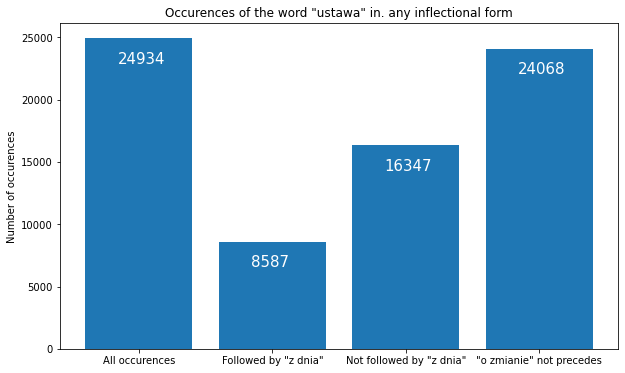

In [174]:
data = [counter, counter_followed_by,counter_not_followed_by, counter_expression_precedes]
xticks = ['All occurences', 'Followed by "z dnia"', 'Not followed by "z dnia"', '"o zmianie" not precedes']
plt.title('Occurences of the word "ustawa" in. any inflectional form')
plt.bar([i for i in range(4)], data)
for i in range(4):
    plt.annotate(data[i], (i-0.16, data[i]-2000), color='white', size=15)
plt.xticks(range(len(xticks)), xticks)
plt.ylabel('Number of occurences')
plt.show()